# Introduction to Time Series Analysis in Python - Part 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

import datetime

## Moving Average (MA) and ARMA Models

### Simulate MA(1) Time Series
You will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be ma = np.array([1, -0.9])

In [9]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

In [10]:
# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

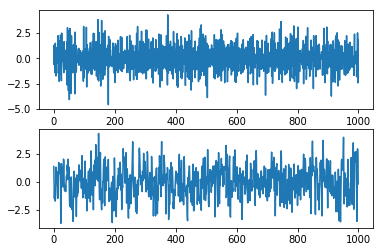

In [11]:
plt.show()

### Compute the ACF for Several MA Time Series
Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

In [29]:
# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

In [30]:
# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9");

In [31]:
# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9");

In [32]:
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

In [33]:
# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3");

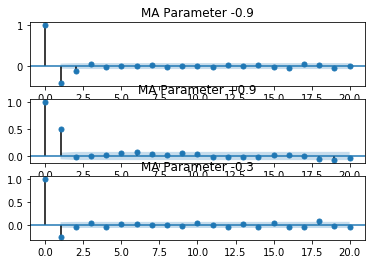

In [34]:
plt.show()

### Estimating an MA Model
You will estimate the MA(1) parameter, θ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true θ of -0.9, you will print out the estimate of θ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

In [38]:
  # Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

In [39]:
# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1413.459
Method:                       css-mle   S.D. of innovations              0.994
Date:                Sun, 19 Aug 2018   AIC                           2832.919
Time:                        21:08:37   BIC                           2847.642
Sample:                             0   HQIC                          2838.514
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.003      1.871      0.062      -0.000       0.012
ma.L1.y       -0.9008      0.012    -75.939      0.000      -0.924      -0.878
                                    Roots           

In [40]:
# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

When the true theta=-0.9, the estimate of theta (and the constant) are:
[ 0.0058885  -0.90077999]


### Forecasting with MA Model
As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.

For the simulated series simulated_data_1 with θ=−0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

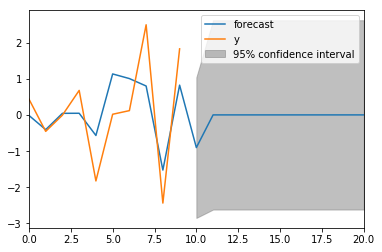

In [41]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### High Frequency Stock Prices
Higher frequency stock data is well modelled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

In [7]:
intraday = pd.read_csv('../datasets/stock/Sprint_Intraday.csv', header=None)
intraday = intraday[[0, 1]]
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [8]:
# Change the first date to zero
intraday.iloc[0,0] = 0
intraday.head()

,0,1
0,0,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [9]:
# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']
intraday.head()

,DATE,CLOSE
0,0,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [10]:
# Examine the data types for each column
print(intraday.dtypes)

DATE      object
CLOSE    float64
dtype: object


In [11]:
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday.DATE)

,DATE,CLOSE
0,0,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [12]:
# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')
intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


### More Data Cleaning: Missing Data
When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. You can fill in the missing rows with the .reindex() method, convert the index to time of day, and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

In [13]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

The length of the DataFrame is:  389


In [14]:
# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))

Missing rows:  {182, 14}


In [18]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')
intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


In [19]:
# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')
intraday.head()

,CLOSE
2017-08-28 09:30:00,8.2900
2017-08-28 09:31:00,8.2700
2017-08-28 09:32:00,8.2800
2017-08-28 09:33:00,8.2750
2017-08-28 09:34:00,8.2875


In [20]:
intraday.tail()

,CLOSE
2017-08-28 15:56:00,8.275
2017-08-28 15:57:00,8.280
2017-08-28 15:58:00,8.275
2017-08-28 15:59:00,8.275
2017-08-28 16:00:00,8.280


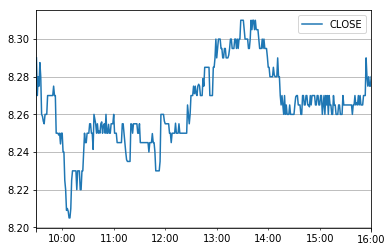

In [21]:
# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### Applying an MA Model
The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

In [22]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

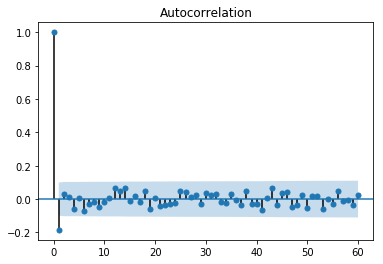

In [23]:
# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

In [24]:
# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

const         -0.000002
ma.L1.CLOSE   -0.179272
dtype: float64


### Equivalence of AR(1) and MA(infinity)
To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8,0.8^2,0.8^3,… for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.

In [25]:
# Build a list MA parameters
ma = [0.8**i for i in range(30)]

In [26]:
# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

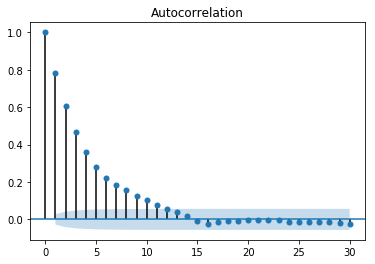

In [27]:
# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()